In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1' )
data = data[['v1', 'v2']]

In [3]:
data[:10]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
#v1 is the target, v2 is the text

#We need to label encode v1 (the target or the label) and create feature vector from v2

In [6]:
#Process the data
#sklearn.feature_extraction.text.TfidfVectorizer (TF-IDF)
#sklearn.feature_extraction.text.CountVectorizer (raw count)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

sentences = data['v2']
#print(sentences)

tfidfVectorizer = TfidfVectorizer(encoding='ISO-8859-1')
X = tfidfVectorizer.fit_transform(sentences)

#print(tfidfVectorizer.get_feature_names())
#print(X.shape)
#print(type(X))

features_vector = pd.DataFrame(X.todense())
features_vector['label'] = data['v1']
features_vector.head()

#f = pd.DataFrame(X.data) #Get one column data frame the containing the prod of X
#f

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [7]:
#label encode the label
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

features_vector['label'] = labelEncoder.fit_transform(features_vector['label'])

#spam is 1, ham is 0

In [8]:
values = features_vector.values
values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
#Separate independent variables and dependent variables
X = values[:,0:-1]
y = values[:,-1]

In [10]:
#Split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True )

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Navie bayes Train classification score:  0.9676923076923077
Navie bayes Test classification score:  0.9629186602870813
Navie bayes misclassification_rate %:  3.7081339712918657
Navie bayes accuracies_mean:  0.9818726150717809
Navie bayes accuracies_std:  0.005415719058921854
-------------------------------------------------
Navie bayes Area under curve:  0.8523157079025904


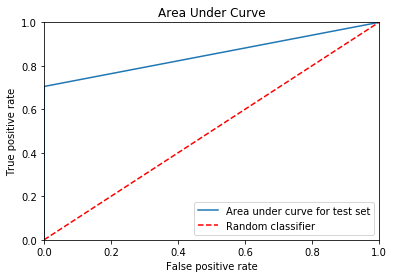

In [17]:
#let's create the classification model and check the results
#We will try MultinomialNB (naive bayes), AdaBoost, and DecisionTree and see which one gives better result

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train, y_train)

#Score
print('Navie bayes Train classification score: ',classifier.score(X_train, y_train))
print('Navie bayes Test classification score: ',classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)
y_pred

#Metrics
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100
print('Navie bayes misclassification_rate %: ',misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10,shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
accuracies_mean = accuracies.mean()
accuracies_std = accuracies.std()
print('Navie bayes accuracies_mean: ',accuracies_mean)
print('Navie bayes accuracies_std: ',accuracies_std)


print('-------------------------------------------------')

#ROC and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('Navie bayes Area under curve: ', area)

plt.plot(fpr, tpr, label='Area under curve for test set')

#plot the random classifier with equal opportunity
plt.plot([0,1],[0,1], 'k', color='red',linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Navie bayes Area Under Curve')
plt.legend(loc='lower right')
plt.show()

----------------------------------------------------------------------------

Train classification score:  0.9828205128205129
Test classification score:  0.97188995215311
AdaBoostClassifier misclassification rate %:  2.811004784688995
AdaBoostClassifier accuracies mean:  0.9725394619151496
AdaBoostClassifier accuracies std:  0.007144201795528349
--------------------------------------------------------------
AdaBoostClassifier Area under curve test set:  0.9279566701290992


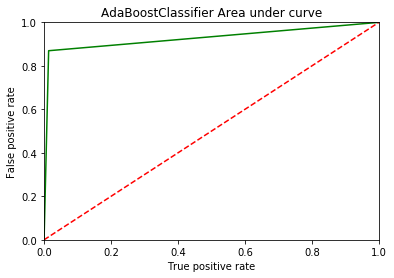

In [18]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

classifier.fit(X_train, y_train)

#Score
print('AdaBoostClassifier Train classification score: ', classifier.score(X_train, y_train))
print('AdaBoostClassifier Test classification score: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)

#Metrics
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100

print('AdaBoostClassifier misclassification rate %: ', misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('AdaBoostClassifier accuracies mean: ', accuracies.mean())
print('AdaBoostClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------')


#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('AdaBoostClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, color='green')

#Plot random classifier (equal probability)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--')
plt.xlim([0 , 1])
plt.ylim([0, 1])
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')
plt.title('AdaBoostClassifier Area under curve')

plt.show()

DecisionTreeClassifier classification score train:  0.9443589743589743
DecisionTreeClassifier classification score test:  0.9461722488038278
DecisionTreeClassifier misclassification_rate %  5.382775119617225
DecisionTreeClassifier accuracies mean:  0.9411356280123291
DecisionTreeClassifier accuracies std:  0.01066367579407718
--------------------------------------------------------------------
DecisionTreeClassifier Area under curve test set:  0.8033503157408781


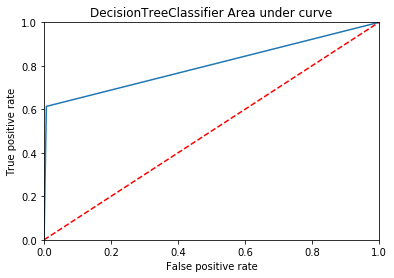

In [21]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)

classifier.fit(X_train, y_train)

#Score
print('DecisionTreeClassifier classification score train: ', classifier.score(X_train, y_train))
print('DecisionTreeClassifier classification score test: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)


#Metrics
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

misclassification_rate = (cm[1,0] + cm[0,1])/len(y_pred) * 100
print('DecisionTreeClassifier misclassification_rate % ', misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('DecisionTreeClassifier accuracies mean: ', accuracies.mean())
print('DecisionTreeClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------------')

#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('DecisionTreeClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, label='Area under curve test set')

#Random classifier (equal opportunity)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--', label='Random classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('DecisionTreeClassifier Area under curve')

plt.show()

<h2>Use count vectorizer and compare the results with Tfidf vectorizer</h2>

In [30]:
countVectorizer = CountVectorizer(encoding='ISO-8859-1')

sentences = data['v2']
X = countVectorizer.fit_transform(sentences)

#print(countVectorizer.get_feature_names())

#Create data frame out of the count vectorizer output
features_vector = pd.DataFrame(X.todense())
#add label column
features_vector['label'] = data['v1']

In [32]:
#Encode the label
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

features_vector['label'] = labelEncoder.fit_transform(features_vector['label'])

In [35]:
#Separate independent variables from dependent variables
X = features_vector.values[:, 0:-1]
y = features_vector.values[:, -1]

[0 0 1 ... 0 0 0]


In [36]:
#Split the data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Navie bayes Train classification score:  0.9941025641025641
Navie bayes Test classification score:  0.9838516746411483
Metrics
-----------------------
Naive bayes misclassification rate:  1.6148325358851676
Naive bayes area under curve:  0.9664305108167813


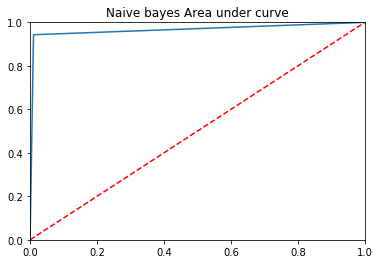

Navie bayes accuracies_mean:  0.9818726150717809
Navie bayes accuracies_std:  0.005415719058921854


In [43]:
#let's create the classification model and check the results
#We will try MultinomialNB (naive bayes), AdaBoost, and DecisionTree and see which one gives better result

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

#train the mode
classifier.fit(X_train, y_train)

#Score
print('Navie bayes Train classification score: ',classifier.score(X_train, y_train))
print('Navie bayes Test classification score: ',classifier.score(X_test, y_test))


#Predict
y_pred = classifier.predict(X_test)

print('Metrics')
print('-----------------------')

#Metrics
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100
print('Naive bayes misclassification rate: ', misclassification_rate)


#ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print('Naive bayes area under curve: ', area)

plt.plot(fpr, tpr, label='Area under curve')

#Plot random classifier
plt.plot([0,1], [0,1], 'k', color='red', linestyle='--',label='Random classifier')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Naive bayes Area under curve')

plt.show()

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y , scoring='accuracy', cv=cv)
print('Navie bayes accuracies_mean: ',accuracies_mean)
print('Navie bayes accuracies_std: ',accuracies_std)

AdaBoostClassifier Train classification score:  0.977948717948718
AdaBoostClassifier Test classification score:  0.9748803827751196
Metrics
-----------------------------------------------
AdaBoostClassifier misclassification rate:  2.511961722488038
AdaBoostClassifer accuracies_mean:  0.9818726150717809
AdaBoostClassifer accuracies_std:  0.005415719058921854
-----------------------------------------------
AdaBoostClassifier area under curve:  0.9268306133239909


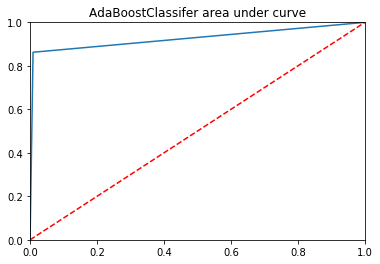

In [48]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

#Train the mode
classifier.fit(X_train, y_train)


#Score
print('AdaBoostClassifier Train classification score: ',classifier.score(X_train, y_train))
print('AdaBoostClassifier Test classification score: ', classifier.score(X_test, y_test))


#Predict
y_pred = classifier.predict(X_test)

print('Metrics')
print('-----------------------------------------------')

#Metrics
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
misclassification_rate = (cm[1,0] + cm[0,1]) / len(y_pred) * 100

print('AdaBoostClassifier misclassification rate: ', misclassification_rate)

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('AdaBoostClassifer accuracies_mean: ',accuracies_mean)
print('AdaBoostClassifer accuracies_std: ',accuracies_std)

print('-----------------------------------------------')

#ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)
print('AdaBoostClassifier area under curve: ', area)

plt.plot(fpr, tpr, label='Area under curve')

plt.plot([0,1] , [0,1], 'k', color='red', linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('AdaBoostClassifer area under curve')

plt.show()

DecisionTreeClassifier classification score train:  0.9417948717948718
DecisionTreeClassifier classification score test:  0.9419856459330144
DecisionTreeClassifier misclassification_rate %  5.801435406698564
DecisionTreeClassifier accuracies mean:  0.94131934389941
DecisionTreeClassifier accuracies std:  0.010269367819198558
--------------------------------------------------------------------
DecisionTreeClassifier Area under curve test set:  0.8228555394441903


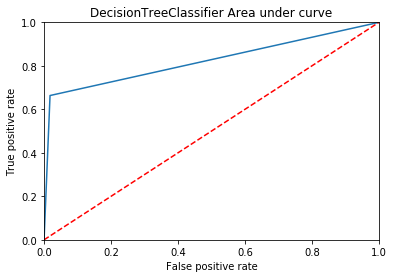

In [47]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)

classifier.fit(X_train, y_train)

#Score
print('DecisionTreeClassifier classification score train: ', classifier.score(X_train, y_train))
print('DecisionTreeClassifier classification score test: ', classifier.score(X_test, y_test))

#Predict
y_pred = classifier.predict(X_test)


#Metrics
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

misclassification_rate = (cm[1,0] + cm[0,1])/len(y_pred) * 100
print('DecisionTreeClassifier misclassification_rate % ', misclassification_rate)


#Cross validation
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
print('DecisionTreeClassifier accuracies mean: ', accuracies.mean())
print('DecisionTreeClassifier accuracies std: ', accuracies.std())


print('--------------------------------------------------------------------')

#ROC and AUC
fpr, tpr, threshold = roc_curve(y_test, y_pred)
area = auc(fpr, tpr)

print('DecisionTreeClassifier Area under curve test set: ', area)

plt.plot(fpr, tpr, label='Area under curve test set')

#Random classifier (equal opportunity)
plt.plot([0,1],[0,1], 'k', color='red', linestyle='--', label='Random classifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('DecisionTreeClassifier Area under curve')

plt.show()

<h2>Word cloud to show the frequency of words used in spam messages</h2>

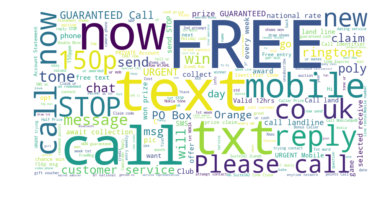

In [71]:
from wordcloud import WordCloud
spam_sms = data[ data['v1'] == 'spam']['v2']
spam_sms.head()

sms_text = " ".join(spam_sms)
#sms_text
wc = WordCloud(width=800, height=400, background_color='white').generate(sms_text)
                          
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Conclusion</h2>

Naive bayes performs better with Count Vectorizer than Tfidf vectorizer
AdaBoostClassifer is slightly better with Tfidf vectorizer than counter vectorizer
Decision Tree Classifier performs better with Counter Vectorizer than Tfidf vectorizer